## Explore Weather Trends Project 



### 1. Data Extraction From Wokspace

**Queries Used For Different Data Extarction**


1. **City List** : 
```sql 
    SELECT * FROM city_list;
```

2. **City Data** : 
```sql 
    SELECT * FROM city_data;
    SELECT * FROM city_data WHERE city = 'Ahamdabad';
```
*I'm taking data of all the cities available, as it will help in some further exploration.*


3. **Global Data** : 
```sql 
    SELECT * FROM global_data
```

###  2. Setting Up Workspace

I'm using jupyter notebook as my workspace. 

Tools to be used in the solution.

1. SQL
2. Python
3. Pandas
4. Matplotlib
5. Seaborn
6. Markdown
7. Jupyter
8. Scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

%matplotlib inline
sns.set_style("whitegrid")
filterwarnings("ignore")
sns.set(font_scale=1.2)

city_data = pd.read_csv("city_data.csv")
global_data = pd.read_csv("global_data.csv")

### 3. Preparing Data

#### I'm from India and closest city to me is Ahmadabad , So i'm gonna use Ahmadabad as my city.

In [2]:
ahm = city_data[city_data.city == "Ahmadabad"]
ahm.describe()

,year,avg_temp
count,218.000000,206.000000
mean,1904.500000,26.530874
std,63.075352,0.552200
min,1796.000000,25.010000
25%,1850.250000,26.157500
50%,1904.500000,26.535000
75%,1958.750000,26.887500
max,2013.000000,28.100000


**Let's check for NaN values in Average Temprature**

In [3]:
ahm.isna().sum().values.sum(),global_data.isna().sum().values.sum()

(12, 0)

We have 12 NaN values in Ahamdabad's record and 0 NaN values in Global Data. 

Before moving futher let's make sure there are no NaN values in data.

In [4]:
from sklearn.impute import SimpleImputer
ahm_impute = SimpleImputer(strategy="most_frequent")
ahm['avg_temp'] = ahm_impute.fit_transform(ahm.avg_temp.values.reshape(-1,1))
ahm['global_avg_temp'] = global_data[48:].avg_temp.tolist()
ahm = ahm.reset_index()

### 4. Data Visualization

**Now that we have our data let's start plotting.**

First let's plot a standalone graph for Ahmadabad's average temprature over the year. 

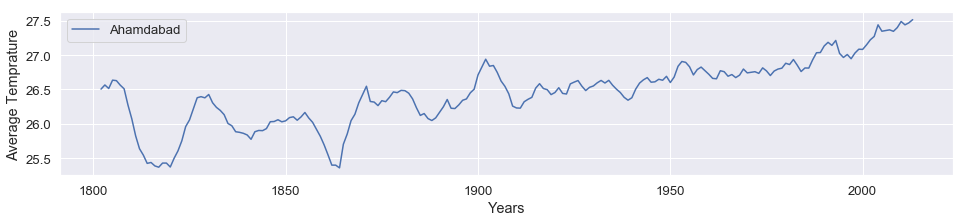

In [5]:
plt.figure(figsize=(16,3))
plt.plot(ahm.year,ahm.avg_temp.rolling(window=7).mean(),label="Ahamdabad")
plt.xlabel("Years")
plt.ylabel("Average Temprature")
plt.legend()

**Moving Averages** :  To calculate moving averages we are using rolling mean from [pandas.DataFrame.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html). Here window parameter defines number of moving rows. I'm using 7 rows to calculate moving averages.

+ Ahamdabad's graph shows a lot of variance in average temprature between years 1800-1920, But after 1920 it seems to be growing continuously with a very less variance.

+ It seems Ahamdabad's temprature in years 1810-1820 and 1855-1865 was at the lowest of all time for Ahmadabad. Let's check lowest and heighest tempratures Ahamdabad went through.

In [6]:
print ("Minimum Temp. ",min(ahm.avg_temp))
print ("Maximum Temp. ",max(ahm.avg_temp))
print ("Temp. Range   ",max(ahm.avg_temp) - min(ahm.avg_temp))

Minimum Temp.  25.01
Maximum Temp.  28.1
Temp. Range    3.09


+ Ahamdabad's minimum temprature is 25.01 and maximum is 28.1 , it doesn't look like ahmadabad is going through a lot of temprature changes. 


Let's check for minimum/maximum in global data.


In [7]:
print("Global \n")
print ("Minimum Temp. ",min(global_data.avg_temp))
print ("Maximum Temp. ",max(global_data.avg_temp))
print ("Temp. Range   ",max(global_data.avg_temp) - min(global_data.avg_temp))

print("\nCity Data \n")
print ("Minimum Temp.                   ",min(city_data.avg_temp))
print ("Maximum Temp.                   ",max(city_data.avg_temp))
print ("Temp. Range                     ",max(city_data.avg_temp) - min(city_data.avg_temp))
print ("City With Lowest Average Temp.  ",city_data.city[city_data.avg_temp == min(city_data.avg_temp)].tolist()[0])
print ("City With Highest Average Temp. ",city_data.city[city_data.avg_temp == max(city_data.avg_temp)].tolist()[0])

Global 

Minimum Temp.  5.78
Maximum Temp.  9.83
Temp. Range    4.05

City Data 

Minimum Temp.                    -14.35
Maximum Temp.                    30.73
Temp. Range                      45.08
City With Lowest Average Temp.   Omsk
City With Highest Average Temp.  Khartoum


+ It seems average global temprature is way lower than average temprature of ahamdabad. 

**Let's create a comaparitive chart between ahamdabad and global average tempratures to see changes over the years.**

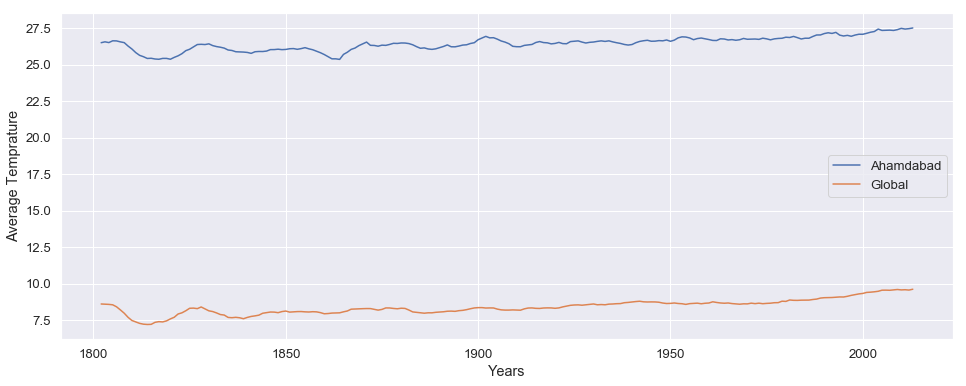

In [8]:
plt.figure(figsize=(16,6))
plt.plot(ahm.year,ahm.avg_temp.rolling(window=7).mean(),label="Ahamdabad")
plt.plot(ahm.year,ahm.global_avg_temp.rolling(window=7).mean(),label="Global")
plt.xlabel("Years")
plt.ylabel("Average Temprature")
plt.legend()

+ Comparison shows that global average and ahamdabad's temprature are related in some sort of way. Whenever the global temprature was at lowest same was the case with ahmadabd and also when it comes to maximum temprature.

+ global temprature seem to be rising after year 1900 but with initial drop in temprature. Also Ahamdabad's temprature seems to be rising after year 1900 with an initial drop.

+ both global and ahamdabad's average temprature had a drop curve in between year 1810 and 1830.

+ Both lines are having a slightly different behaviour between years 1850 and 1900.

Let's check for correlation coefficient.

In [9]:
print ("Correlation Coefficient :",ahm[['avg_temp','global_avg_temp']].corr().iloc[0][1])

Correlation Coefficient : 0.7106731155078823


+ It's 0.710673 which shows global average temprature and Ahamdabad's temprature are positively co-related. It means change in global average temprature have a positive effect on temprature of ahamdabad.

### 5. Further Exploration

Let's take top 10 largest cities available in this list. We'll use info from [World Atlas](https://www.worldatlas.com/articles/the-10-largest-cities-in-the-world.html).

Text(0, 0.5, 'Average Temprature')

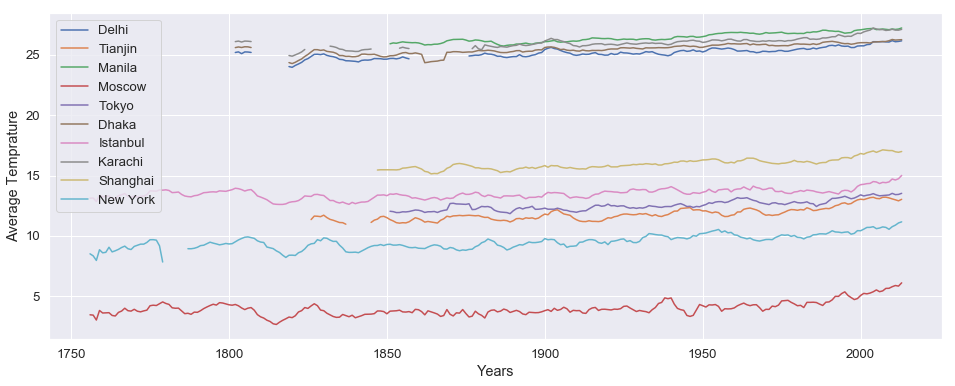

In [10]:
top10 = ['Delhi','Tianjin','Manila','Moscow','Tokyo','Dhaka','Istanbul','Karachi','Shanghai','New York']
plt.figure(figsize=(16,6))
for i in top10:
    tdf = city_data[city_data.city == i]
    plt.plot(tdf.year,tdf.avg_temp.rolling(window=7).mean(),label=i)
plt.legend()
plt.xlabel("Years")
plt.ylabel("Average Temprature")

+ Cities like Delhi, Karachi, Manila and Dhaka are highly co related with average temprature above 20, where as cities like Shannghai, Istanbul, Tokyo, Tianjin and New York are middle ground between cities with higher average temprature and cities like Moscow with lower average temprature.

+ Let's create a quick co-relation heatmap for fun.

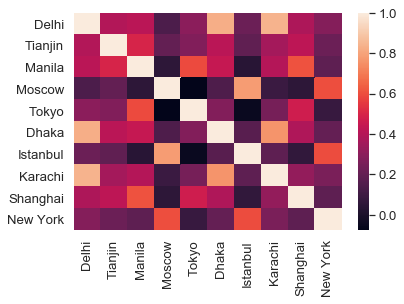

In [11]:
mask = []
for i in city_data.city:
    mask.append(i in top10)

tdf = city_data[mask]
cols = []

for i in top10:
    cols.append(pd.Series(tdf[tdf.city == i].avg_temp.values))
tdf = pd.concat(cols,axis=1)
tdf.columns = top10

sns.heatmap(tdf.corr())

**That's all for this project. Thank You !**